### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**: BLANCHETTE, Michael David

**Student ID**: 20722991

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [1]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Loading the Dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(10) # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000




---



> Q0. Generate Y - Predictor Value

In [4]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

data['Y'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

In [5]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

# Existence of missing values:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Income is missing 24 values.

<Axes: >

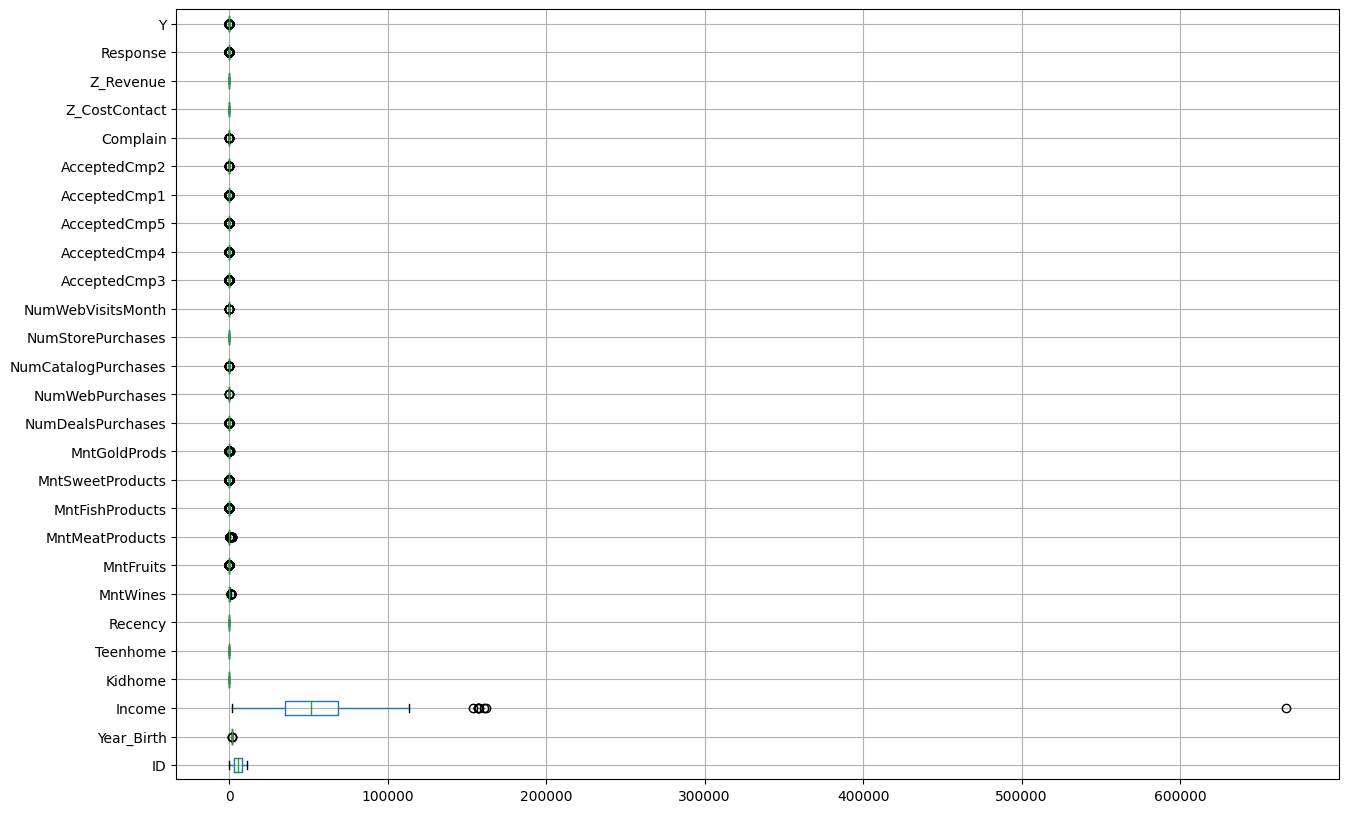

In [6]:
# Existence of outliers:
data.boxplot(vert=False, figsize=(15,10))


There exists outliers in the dataset.

In [7]:
# Existence of imbalances:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [8]:
data['Y'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: Y, dtype: int64

There exists imbalances in the dataset. There are much more customers who did not accept the offer than those who did.

>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

In [9]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT


# (i) Handling missing values using mean imputation
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [10]:

# (ii) Handling outliers using Quartile Bound

for x in data:
    if data[x].dtype != 'object':
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3 - Q1
        LB = Q1 - 1.5*IQR
        UB = Q3 + 1.5*IQR
        data[x] = data[x].mask(data[x] < LB, LB)
        data[x] = data[x].mask(data[x] > UB, UB)

> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | (Quartile Bound) | (Replace outliers with upper/lower bound to preserve the remaining data as much as possible.) |
|Handling Missing Values| (Mean Imputation) | (Can't use KNN because 'Income' has only 1 input value.) |


>  Q1d. Plot 3 or more types of charts over all columns of data

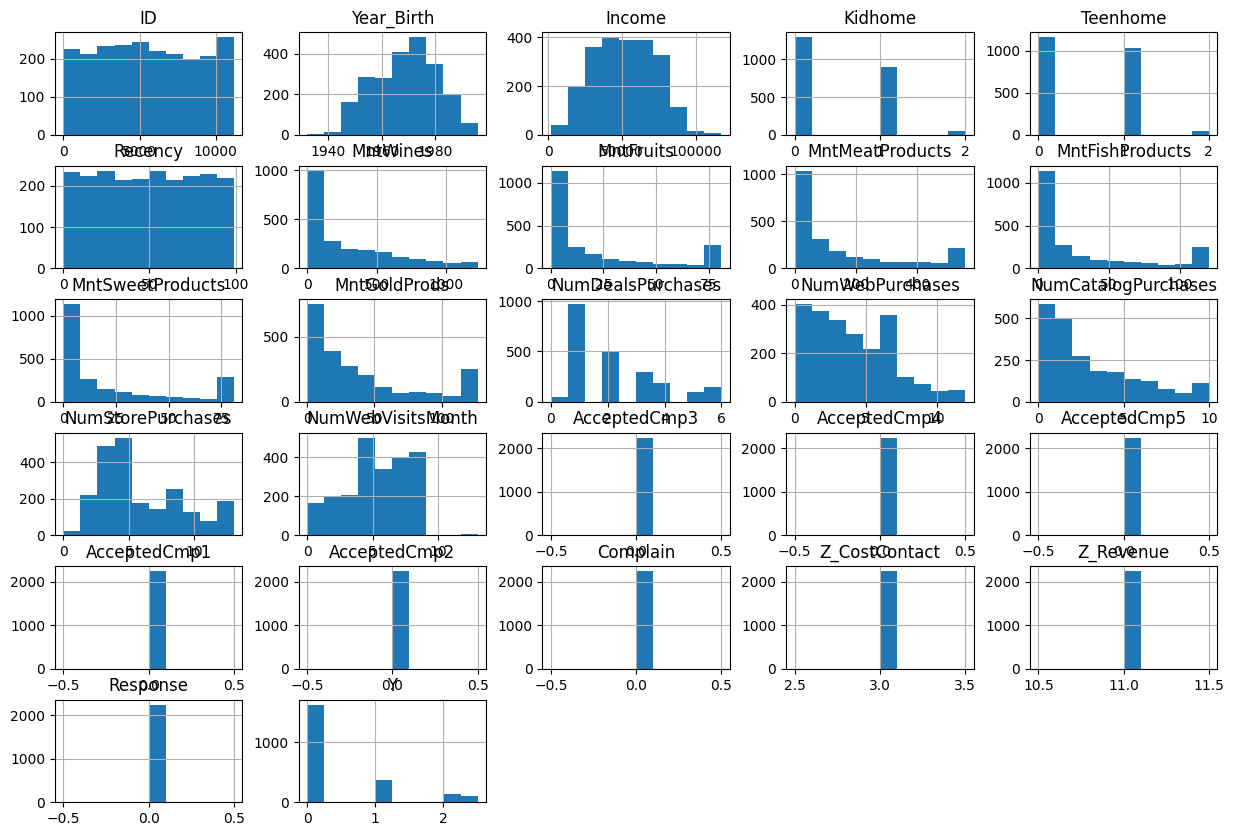

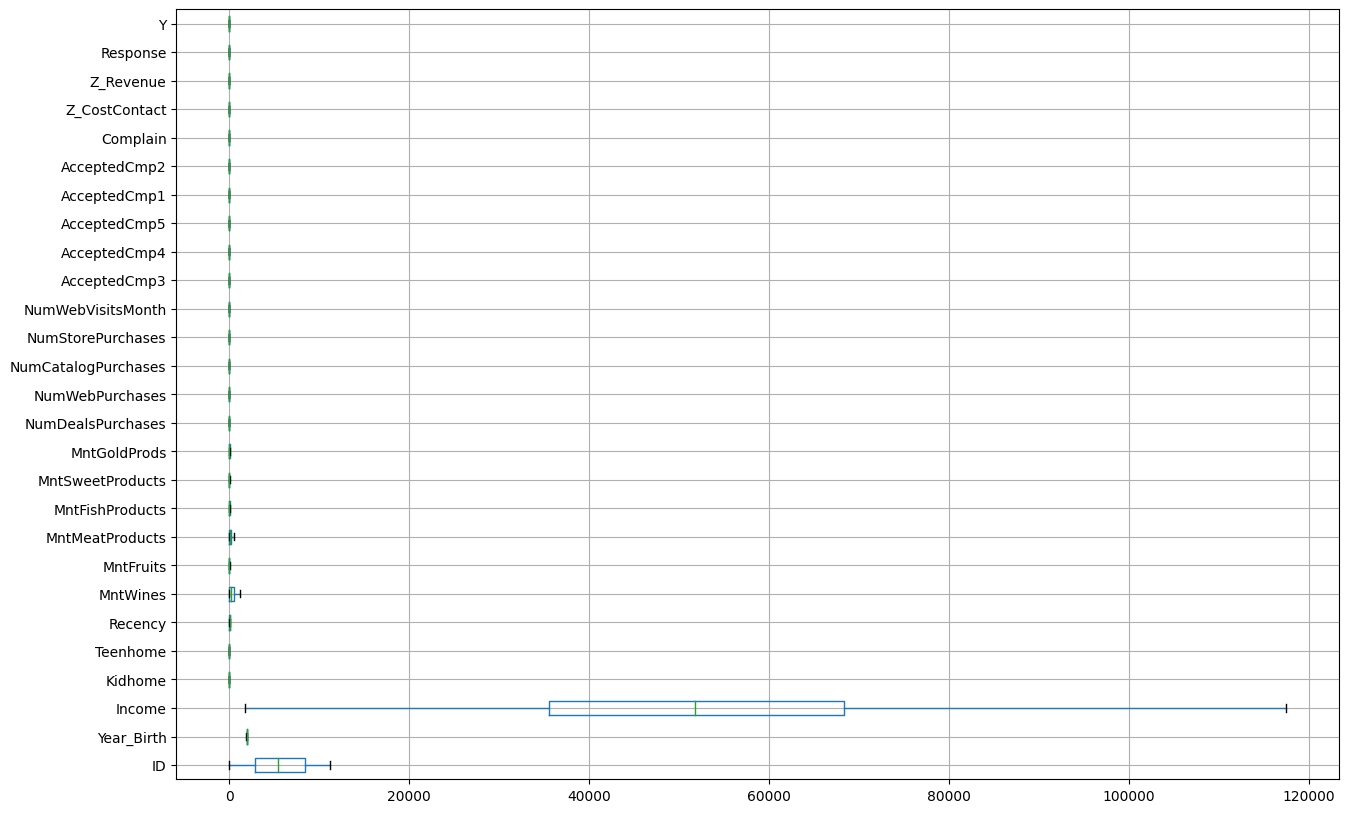

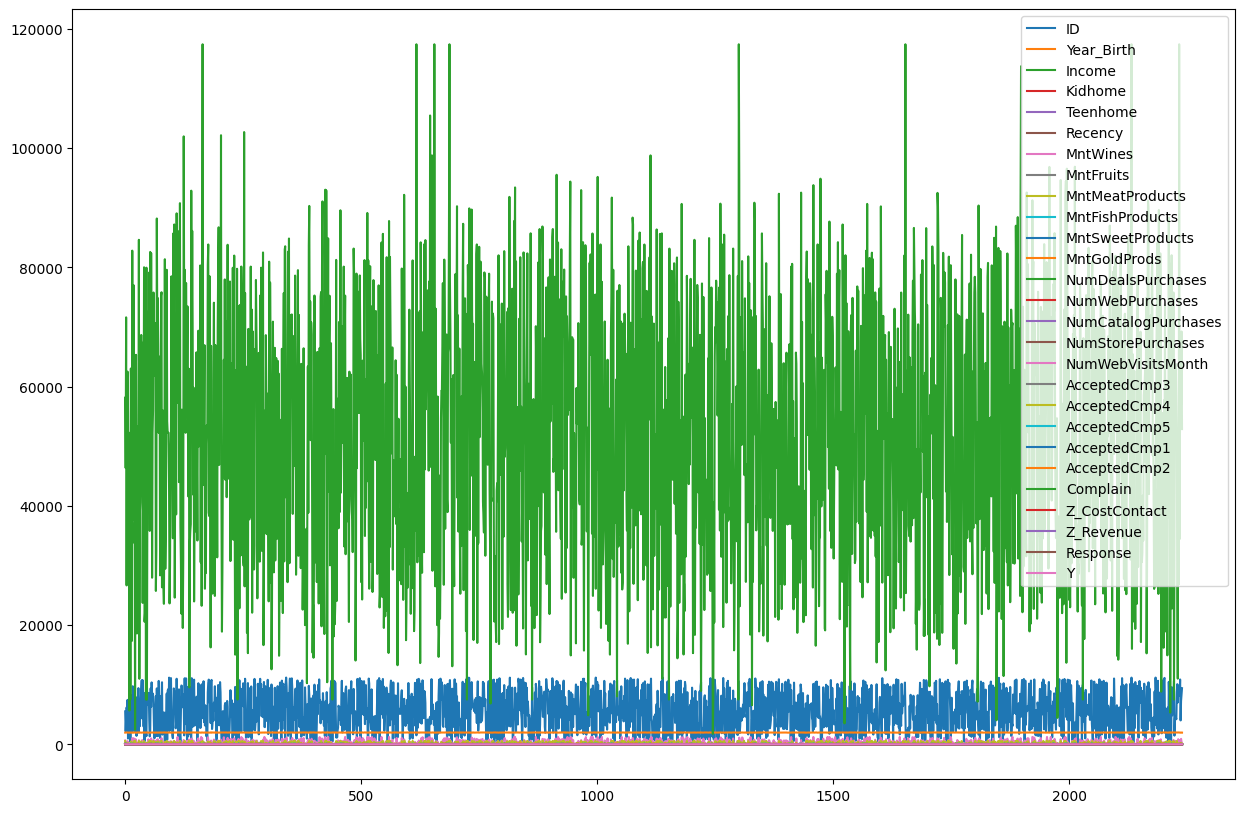

In [11]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# import xxx as xxx (Import Graphing Libraries)
# ....
# plt.show()

# 1. Histogram
data.hist(figsize=(15,10))
plt.show()

# 2. Boxplot
data.boxplot(vert=False, figsize=(15,10))
plt.show()

# 3. Line Plot
data.plot(figsize=(15,10))
plt.show()

# export to csv for dashboard (part1d)
data.to_csv('./assets/part1d.csv', index=False)

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | (The values of Income are generally much larger than the other variables.) | (Need to normalize for better handling in relation to the data.) |
| Pattern 2 | (Most customers prefer to buy more when they are in the store rather than online/catalogue.) | (Need to balance data to reflect all types of purchases more fairly.) |
| Pattern 3 | (As time goes on, more customers turn down campaign offers than in the past.) | (Need to observe what factors may have changed drastically over time in accordance with the acceptance/denial of campaign offers.) |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | (Nominal) | (Can be removed as there is no predictive value) |
Year_Birth         | (Discrete) | (None) |      
Education          | (Ordinal) | (Rank Replacement) |       
Marital_Status     | (Nominal) | (One hot encoding) |
Income             | (Continuous) | (Normalization) |      
Kidhome            | (Discrete) | (None) |        
Teenhome           | (Discrete) | (None) |   
Dt_Customer        | (Continuous) | (Feature Engineer) |      
Recency            | (Discrete) | (None) |     
MntWines           | (Continuous) | (None) |    
MntFruits          | (Continuous) | (None) |    
MntMeatProducts    | (Continuous) | (None) |     
MntFishProducts    | (Continuous) | (None) |    
MntSweetProducts   | (Continuous) | (None) |    
MntGoldProds       | (Continuous) | (None) |
NumDealsPurchases  | (Discrete) | (None) |  
NumWebPurchases    | (Discrete) | (None) |
NumCatalogPurchases| (Discrete) | (None) |
NumStorePurchases  | (Discrete) | (None) |  
NumWebVisitsMonth  | (Discrete) | (None) |  
AcceptedCmp3       | (Nominal) | (None) |  
AcceptedCmp4       | (Nominal) | (None) |       
AcceptedCmp5       | (Nominal) | (None) |       
AcceptedCmp1       | (Nominal) | (None) |       
AcceptedCmp2       | (Nominal) | (None) |       
Complain           | (Nominal) | (None) |       
Z_CostContact      | (Discrete) | (None) |     
Z_Revenue          | (Continuous) | (None) |          
Response           | (Nominal) | (None) |


>  Q2b. Perform the aforementioned Data Preprocessings

In [12]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# import xxx as xxx (Import panda Libraries)
# from sklearn.preprocessing import xxx (Import sklearn libraries)
# ....

# Remove ID Column
data.drop(columns=['ID'], inplace=True)

# Education --> Label Encoding
data['Education'] = data['Education'].map({'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4})

# Marital_Status --> One Hot Encoding
data = pd.get_dummies(data, columns=['Marital_Status'])

# Dt_Customer --> Feature Engineer
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer_Year'] = data['Dt_Customer'].dt.year
data['Dt_Customer_Month'] = data['Dt_Customer'].dt.month
data['Dt_Customer_Day'] = data['Dt_Customer'].dt.day
data.drop(columns=['Dt_Customer'], inplace=True)

# Income --> Normalization
mean_income = data['Income'].mean()
std_income = data['Income'].std()
data['Income_zscore'] = (data['Income'] - mean_income) / std_income

# Y --> Convert to integers
data['Y'] = data['Y'].astype(int)

/var/folders/cq/yw6y1gqx1czfn893ny8l4qkw0000gn/T/ipykernel_48410/2344060987.py:18: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])




---



In [13]:
data

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Day,Income_zscore
0,1957,2,58138.0,0,0,58,635,81,546,120.5,...,0,0,1,0,0,0,2012,4,9,0.299141
1,1954,2,46344.0,1,1,38,11,1,6,2.0,...,0,0,1,0,0,0,2014,8,3,-0.264192
2,1965,2,71613.0,0,0,26,426,49,127,111.0,...,0,0,0,1,0,0,2013,8,21,0.942767
3,1984,2,26646.0,1,0,26,11,4,20,10.0,...,0,0,0,1,0,0,2014,10,2,-1.205056
4,1981,4,58293.0,1,0,94,173,43,118,46.0,...,0,1,0,0,0,0,2014,1,19,0.306545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,61223.0,0,1,46,709,43,182,42.0,...,0,1,0,0,0,0,2013,6,13,0.446495
2236,1946,4,64014.0,2,1,56,406,0,30,0.0,...,0,0,0,1,0,0,2014,10,6,0.579805
2237,1981,2,56981.0,0,0,91,908,48,217,32.0,...,1,0,0,0,0,0,2014,1,25,0.243878
2238,1956,3,69245.0,0,1,8,428,30,214,80.0,...,0,0,0,1,0,0,2014,1,24,0.829661


#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

>  Q3a. Generate Test/Training Data Split

In [14]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split # Import Train Test Split From Libraries
# .....

X = data.drop(columns=['Y']) # Define X as all columns except Y
y = data['Y'] # Define y as Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split X and y into Train and Test Data 

> Q3b. Choose and deploy dataset to 3+ ML Model

In [15]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Model 1: Random Forest Classifier
# Step 1. Import Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Step 2. Fit Dataframe into Model
rfc.fit(X_train, y_train)

# Step 3. Generate Model Prediction (Y)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.7566964285714286

In [16]:
# Model 2: Support Vector Machine
# Step 1. Import Model
from sklearn.svm import SVC
svc = SVC(probability=True)

# Step 2. Fit Dataframe into Model
svc.fit(X_train, y_train)

# Step 3. Generate Model Prediction (Y)
svc.predict(X_test)
svc.score(X_test, y_test)

0.7008928571428571

In [17]:
# Model: 3 Gradient Boosting Classifier
# Step 1. Import Model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Step 2. Fit Dataframe into Model
gbc.fit(X_train, y_train)

# Step 3. Generate Model Prediction (Y)
gbc.predict(X_test)
gbc.score(X_test, y_test)

0.7566964285714286



---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

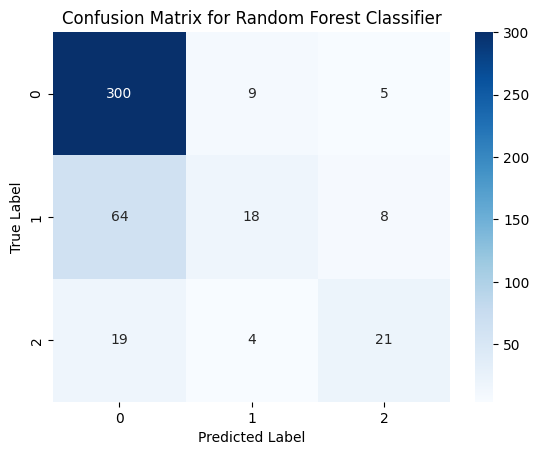

In [18]:
#@title Q4a. Evaluate the Model's Accuracy

# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score ...
# print(xxxx)

# Model 1: Random Forest Classifier Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import seaborn as sns

# 4.1.1 RFC Confusion Matrix
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save graph to data
plt.savefig('./assets/part4a_rfc_cm.png')

plt.show()

In [19]:
# 4.1.2 RFC Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score

# Accuracy Score
rfc_accuracy_score = accuracy_score(y_test, y_pred_rfc)
print("Accuracy Score for Random Forest Classifier: ", rfc_accuracy_score)

# Recall Score
rfc_recall_score = recall_score(y_test, y_pred_rfc, average='macro')
print("Recall Score for Random Forest Classifier: ", rfc_recall_score)

# Precision Score
rfc_precision_score = precision_score(y_test, y_pred_rfc, average='macro')
print("Precision Score for Random Forest Classifier: ", rfc_precision_score)

# AUC Score
y_pred_rfc_proba = rfc.predict_proba(X_test)
rfc_auc_score = roc_auc_score(y_test, y_pred_rfc_proba, multi_class='ovr', average='macro')
print("AUC Score for Random Forest Classifier: ", rfc_auc_score)

# F1 Score
rfc_f1_score = f1_score(y_test, y_pred_rfc, average='macro')
print("F1 Score for Random Forest Classifier: ", rfc_f1_score)

# Output to csv for dashboard (part4a)
part4a = pd.DataFrame({'Model': ['Random Forest Classifier'], 'Accuracy': [rfc_accuracy_score], 'Recall': [rfc_recall_score], 'Precision': [rfc_precision_score], 'AUC': [rfc_auc_score], 'F1': [rfc_f1_score]})
part4a.to_csv('./assets/part4a_scores.csv', index=False)

Accuracy Score for Random Forest Classifier:  0.7566964285714286
Recall Score for Random Forest Classifier:  0.5442289133371936
Precision Score for Random Forest Classifier:  0.6605273457820761
AUC Score for Random Forest Classifier:  0.8275103120408952
F1 Score for Random Forest Classifier:  0.5656047791172351


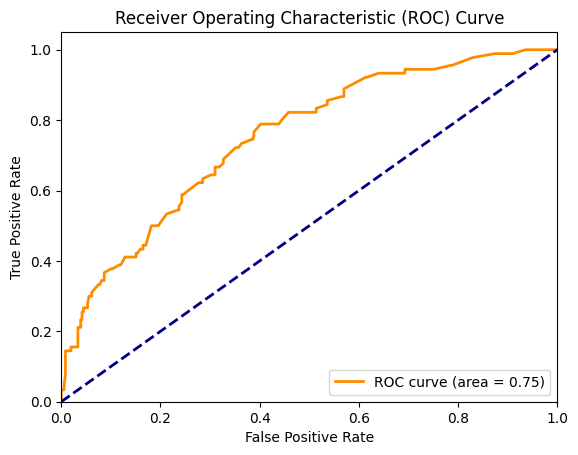

In [20]:
# 4.1.3 RFC ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_rfc_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc_proba, pos_label=1)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save graph to data
plt.savefig('./assets/part4a_rfc_roc.png')

plt.show()


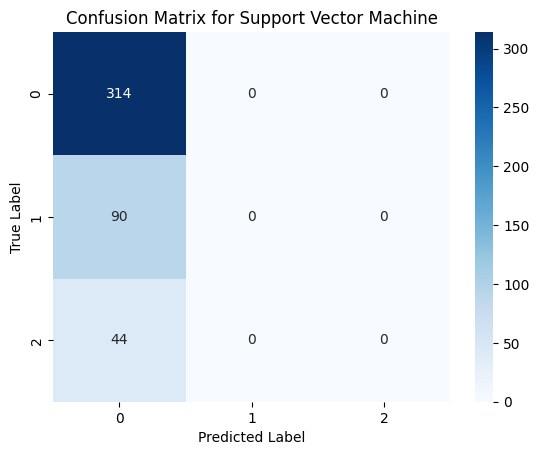

In [21]:
# 4.2.1 SVM Confusion Matrix
y_pred_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save graph to data
plt.savefig('./assets/part4a_svc_cm.png')

plt.show()

In [22]:
# 4.2.2 SVM Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score

# Accuracy Score
svc_accuracy_score = accuracy_score(y_test, y_pred_svc)
print("Accuracy Score for Support Vector Machine: ", svc_accuracy_score)

# Recall Score
svc_recall_score = recall_score(y_test, y_pred_svc, average='macro')
print("Recall Score for Support Vector Machine: ", svc_recall_score)

# Precision Score
svc_precision_score = precision_score(y_test, y_pred_svc, average='macro')
print("Precision Score for Support Vector Machine: ", svc_precision_score)

# AUC Score
y_pred_svc_proba = svc.predict_proba(X_test)
svc_auc_score = roc_auc_score(y_test, y_pred_svc_proba, multi_class='ovr', average='macro')
print("AUC Score for Support Vector Machine: ", svc_auc_score)

# F1 Score
svc_f1_score = f1_score(y_test, y_pred_svc, average='macro')
print("F1 Score for Support Vector Machine: ", svc_f1_score)

# Add to csv for dashboard (part4a)
part4a = part4a.append({'Model': 'Support Vector Machine', 'Accuracy': svc_accuracy_score, 'Recall': svc_recall_score, 'Precision': svc_precision_score, 'AUC': svc_auc_score, 'F1': svc_f1_score}, ignore_index=True)
part4a.to_csv('./assets/part4a_scores.csv', index=False)

Accuracy Score for Support Vector Machine:  0.7008928571428571
Recall Score for Support Vector Machine:  0.3333333333333333
Precision Score for Support Vector Machine:  0.23363095238095236
AUC Score for Support Vector Machine:  0.6480169164237765
F1 Score for Support Vector Machine:  0.2747156605424322


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cq/yw6y1gqx1czfn893ny8l4qkw0000gn/T/ipykernel_48410/3772992829.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  part4a = part4a.append({'Model': 'Support Vector Machine', 'Accuracy': svc_accuracy_score, 'Recall': svc_recall_score, 'Precision': svc_precision_score, 'AUC': svc_auc_score, 'F1': svc_f1_score}, ignore_index=True)


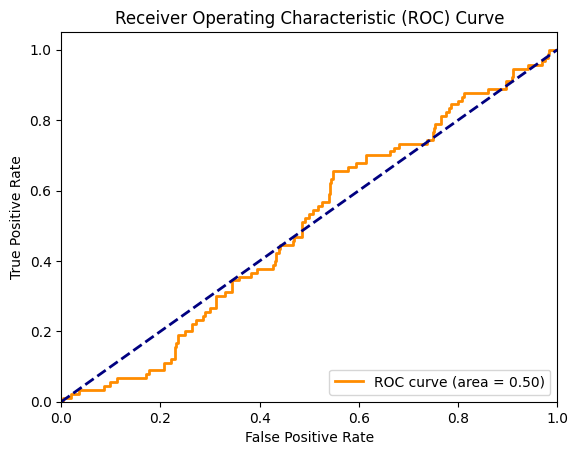

In [23]:
# 4.2.3 SVM ROC Curve

y_pred_svc_proba = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_proba, pos_label=1)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save graph to data
plt.savefig('./assets/part4a_svc_roc.png')

plt.show()

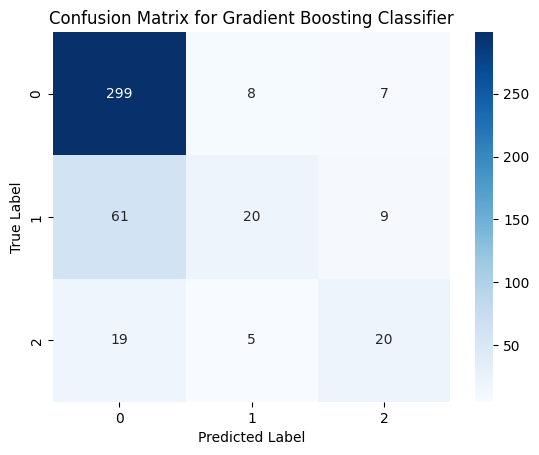

In [24]:
# 4.3.1 GBC Confusion Matrix
y_pred_gbc = gbc.predict(X_test)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm_gbc, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save graph to data
plt.savefig('./assets/part4a_gbc_cm.png')

plt.show()

In [25]:
# 4.3.2 GBC Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score

# Accuracy Score
gbc_accuracy_score = accuracy_score(y_test, y_pred_gbc)
print("Accuracy Score for Gradient Boosting Classifier: ", gbc_accuracy_score)

# Recall Score
gbc_recall_score = recall_score(y_test, y_pred_gbc, average='macro')
print("Recall Score for Gradient Boosting Classifier: ", gbc_recall_score)

# Precision Score
gbc_precision_score = precision_score(y_test, y_pred_gbc, average='macro')
print("Precision Score for Gradient Boosting Classifier: ", gbc_precision_score)

# AUC Score
y_pred_gbc_proba = gbc.predict_proba(X_test)
gbc_auc_score = roc_auc_score(y_test, y_pred_gbc_proba, multi_class='ovr', average='macro')
print("AUC Score for Gradient Boosting Classifier: ", gbc_auc_score)

# F1 Score
gbc_f1_score = f1_score(y_test, y_pred_gbc, average='macro')
print("F1 Score for Gradient Boosting Classifier: ", gbc_f1_score)

# Add to csv for dashboard (part4a)
part4a = part4a.append({'Model': 'Gradient Boosting Classifier', 'Accuracy': gbc_accuracy_score, 'Recall': gbc_recall_score, 'Precision': gbc_precision_score, 'AUC': gbc_auc_score, 'F1': gbc_f1_score}, ignore_index=True)
part4a.to_csv('./assets/part4a_scores.csv', index=False)

Accuracy Score for Gradient Boosting Classifier:  0.7566964285714286
Recall Score for Gradient Boosting Classifier:  0.542998992043578
Precision Score for Gradient Boosting Classifier:  0.650178122473637
AUC Score for Gradient Boosting Classifier:  0.7995259239768907
F1 Score for Gradient Boosting Classifier:  0.5627060383157945


/var/folders/cq/yw6y1gqx1czfn893ny8l4qkw0000gn/T/ipykernel_48410/1733875897.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  part4a = part4a.append({'Model': 'Gradient Boosting Classifier', 'Accuracy': gbc_accuracy_score, 'Recall': gbc_recall_score, 'Precision': gbc_precision_score, 'AUC': gbc_auc_score, 'F1': gbc_f1_score}, ignore_index=True)


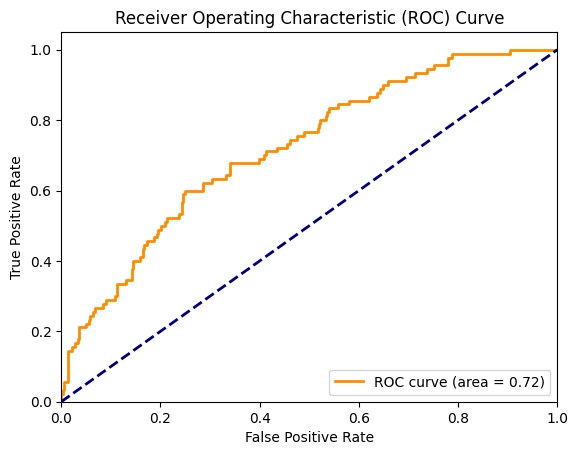

In [26]:
# 4.3.3 GBC ROC Curve

y_pred_gbc_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbc_proba, pos_label=1)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save graph to data
plt.savefig('./assets/part4a_gbc_roc.png')

plt.show()

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

I will choose the Random Forest model because it has the highest AUC score.



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [27]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Import the Random Forest Classifier model from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Step 2. Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 3. Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Step 4. Perform a grid search over the hyperparameter grid
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 5. Print the best hyperparameters
print("Best Hyperparameters for Random Forest Classifier: ")
print(grid_search.best_params_)

# Step 6. Use the best hyperparameters to create a new Random Forest Classifier object
rfc_tuned = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                    max_features=grid_search.best_params_['max_features'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    bootstrap=grid_search.best_params_['bootstrap'], 
                                    random_state=42)

# Step 7. Fit the training data to the new Random Forest Classifier object
rfc_tuned.fit(X_train, y_train)

# Step 8. Generate predictions and evaluate accuracy
y_pred_rfc_tuned = rfc_tuned.predict(X_test)
print("Accuracy Score for Tuned Random Forest Classifier: ", accuracy_score(y_test, y_pred_rfc_tuned))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [28]:
# @title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)
# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)
# Number of features to consider at every split
rf_max_features = ["auto", "sqrt", "log2"]
# Criterion to split on
rf_criterion = ["poisson", "friedman_mse"]
# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]
# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]
# Method of selecting samples for training each tree
rf_bootstrap = [True, False]
# Create the grid
rf_grid = {
    "n_estimators": rf_n_estimators,
    "max_depth": rf_max_depth,
    "max_features": rf_max_features,
    "criterion": rf_criterion,
    "min_samples_split": rf_min_samples_split,
    "min_impurity_decrease": rf_min_impurity_decrease,
    "bootstrap": rf_bootstrap,
}
# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
rf_base = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest Classifier: ")
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=poisson, max_depth=20, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=800; total time=   1.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=20, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=800; total time=   1.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=20, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=800; total time=   1.1s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=log2, min_impurity_decrease=0.0,

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=200; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=2000; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=2000; total time=   3.2s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=400; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=400; total time=   4.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   5.9s
[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, criterion=poisson, max_depth=30, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, criterion=poisson, max_depth=30, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   1.5s
[CV] END b

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=15, max_features=log2, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=800; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=800; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=200; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=200; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=800; total time=   3.0s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=auto, min_impurity_decrease=0.0, min_samples_split=5, n_estimators=600; total time=   6.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=auto, min_impurity_decrease=0.0, min_samples_split=5, n_estimators=600; total time=   6.7s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=auto, min_impurity_decrease=0.0, min_samples_split=5, n_estimators=600; total time=   7.1s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=log2, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=2000; total time=   7.4s
[CV]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=2, n_estimators=800; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=2000; total time=   7.2s
[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=2000; total time=   7.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=2000; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=2, n_estimators=800; total time=   2.7s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=20, max_features=auto, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=1500; total time=  25.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=45, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=1000; total time=   1.5s
[CV] END 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=4, n_estimators=1500; total time=   4.6s
[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=400; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=45, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=4, n_estimators=1500; total time=   5.1s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.05, min_samples_split=5, n_estimators=600; total time=   8.1s
[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.05, min_samples_split=5, n_estimators=600; total time=   8.5s
[CV] E

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

[CV] END bootstrap=False, criterion=poisson, max_depth=55, max_features=log2, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=600; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=55, max_features=log2, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, criterion=poisson, max_depth=35, max_features=log2, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=1500; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=20, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=20, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=20, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=200; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=poisson, max_depth=50, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=1500; total time=   3.8s
[CV] END bootstrap=True, criterion=poisson, max_depth=None, max_features=auto, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=1500; total time=   3.7s
[CV] END bootstrap=False, criterion=poisson, max_depth=45, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=200; total time=   0.3s
[CV] END bootstra

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=log2, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=800; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=2000; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=2000; total time=   5.4s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.1, min_samples_split=4, n_estimators=800; total time=  10.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=400; total time=   4.8s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.1, min_samples_split=4, n_estimators=800; total time=  10.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=200; total time=   0.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=50, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.1, min_samples_split=4, n_estimators=800; total time=  11.1s
[CV] END bootstrap=False, criterion=poisson, max_depth=50, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=auto, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=400; total time=   5.3s
[CV] END bootstrap=True, criterion=poisson, max_depth=30, max_features=auto, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=600; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=30, max_features=auto, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, criterion=poisson, max_depth=30, max_features=auto, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=10, max_features=auto, min_impurity_decrease=0.05, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=55, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=2000; total time=   6.1s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=55, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=2000; total time=   6.5s
[CV] END bootstrap=True, criterion=poisson, max_depth=20, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=600; total time=   2.0s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

[CV] END bootstrap=False, criterion=friedman_mse, max_depth=10, max_features=auto, min_impurity_decrease=0.05, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=55, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=2000; total time=   6.2s
[CV] END bootstrap=True, criterion=poisson, max_depth=15, max_features=auto, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=15, max_features=auto, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=20, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=3, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, criterion=poisson, max_depth=15, max_features=auto, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=800; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=800; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=800; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=auto, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=200; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=40, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=auto, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=poisson, max_depth=40, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=4, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=False, criterion=poisson, max_depth=40, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=4, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=auto, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=1500; total time=   3.0s
[CV] END bootstrap=T

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1500; total time=  15.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1500; total time=  15.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=2000; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1500; total time=  15.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=log2, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=1500; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=log2, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=1500; total time=   3.6s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=log2, min_impurity_decrease=0.05, min_samples_split=9, n_estimators=1500; total time=   4.2s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1500; total time=   4.6s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1500; total time=  14.3s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1500; total time=   4.0s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1500; total tim

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1500; total time=   4.5s
[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1500; total time=  14.7s
[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=400; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=25, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=400; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.0, min_samples_split=5, n_estimators=2000; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.0, min_samples_split=5, n_estimators=2000; total time=  20.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.0, min_samples_split=5, n_estimators=2000; total time=  20.5s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=log2, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1000; total time=   3.4s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=800; total time=  12.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=800; total time=  11.9s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=50, max_features=log2, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1000; total tim

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=None, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=200; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=None, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1500; total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=8, n_estimators=1500; total time=   5.3s
[CV] END bootstrap=False, criterion=poisson, max_depth=35, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, criterion=poisson, max_depth=35, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.05, min_samples_split=4, n_estimators=2000; total time=  28.9s
[CV] END bootstrap=False, criterion=poisson, max_depth=35, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=600; total time=   2.6s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.05, min_samples_split=4, n_estimators=2000; total time=  29.3s
[C

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=50, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=1500; total time=   4.7s
[CV] END bootstrap=True, criterion=poisson, max_depth=15, max_features=log2, min_impurity_decrease=0.05, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=log2, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=600; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

[CV] END bootstrap=True, criterion=poisson, max_depth=15, max_features=log2, min_impurity_decrease=0.05, min_samples_split=3, n_estimators=800; total time=   1.3s
[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=log2, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=600; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=35, max_features=log2, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, criterion=poisson, max_depth=55, max_features=auto, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=55, max_features=auto, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=log2, min_impurity_decrease=0.05, min_samples_split=3, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=False, criterion=poisson, max_depth=55, max_features=auto, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=log2, min_impurity_decrease=0.05, min_samples_split=3, n_estimators=2000; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=10, max_features=log2, min_impurity_decrease=0.05, min_samples_split=3, n_estimators=2000; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=10, n_estimators=1500; total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=10, n_estimators=1500; total time=   5.2s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=10, n_estimators=1500; total time=   5.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=1500; total time=   4.6s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=1500; total time=   4.9s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=1000; total time=  11.5s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=1000; t

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=40, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=1000; total time=  10.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=poisson, max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=1000; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=600; total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=600; total time=   5.7s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=600; total time=   5.6s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.05, min_samples_split=10, n_estimators=2000; total time=  28.0s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.05, min_samples_split=10, n_estimators=2000; total time=  28.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=55, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=1500; total time=   4.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=55, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=1500; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1000; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=auto, min_impurity_decrease=0.05, min_samples_split=10, n_estimators=2000; total time=  31.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1000; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=55, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=1500; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=5, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=200; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=poisson, max_depth=5, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=200; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.0, min_samples_split=9, n_estimators=1000; total time=  10.4s
[CV] END bootstrap=True, criterion=poisson, max_depth=5, max_features=auto, min_impurity_decrease=0.1, min_samples_split=7, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=poisson, max_depth=40, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=True, criterion=poisson, max_depth=40, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=2000; total time=   4.1s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=5, max_features=auto, min_impurity_decrease=0.05, min_samples_split=2, n_estimators=2000; total time=  13.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=40, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=2000; total time=   3.6s
[CV] END boots

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=45, max_features=sqrt, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=1500; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=2, n_estimators=2000; total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, criterion=friedman_mse, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=2, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=2, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.05, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.05, min_samples_split=5, n_estimators=200; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.05, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=1500; total time=   4.6s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=1500; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=1500; total time=   4.6s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=800; total time=   2.1s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=35, max_features=log2, min_impurity_decrease=0.05, min_samples_split=8, n_estimators=800; total time=   2.1s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, criterion=friedman_mse, max_depth=30, max_features=auto, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=200; total t

>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [29]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
# e.g. from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

# Step 2. Add ensembling methods on top of Base models
model = XGBClassifier()
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, Y_pred)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
print("Accuracy Score for XGBoost Classifier: ", boosting_accuracy)

Accuracy Score for XGBoost Classifier:  0.7388392857142857




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

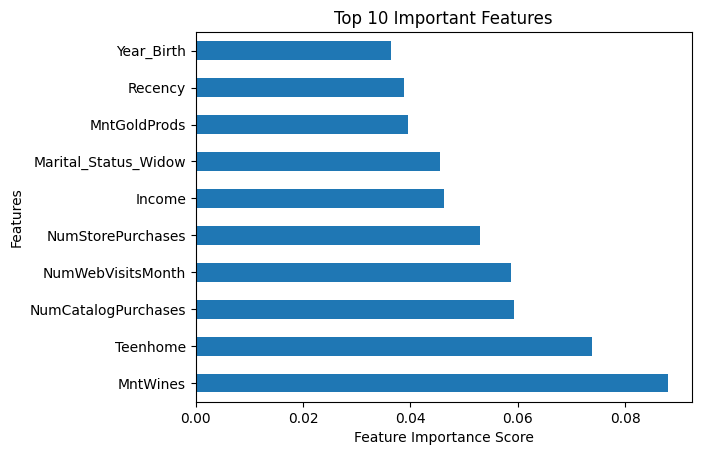

In [30]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

from sklearn.model_selection import learning_curve

# 1. Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Save graph to data
plt.savefig('./assets/part6_10important.png')

plt.show()


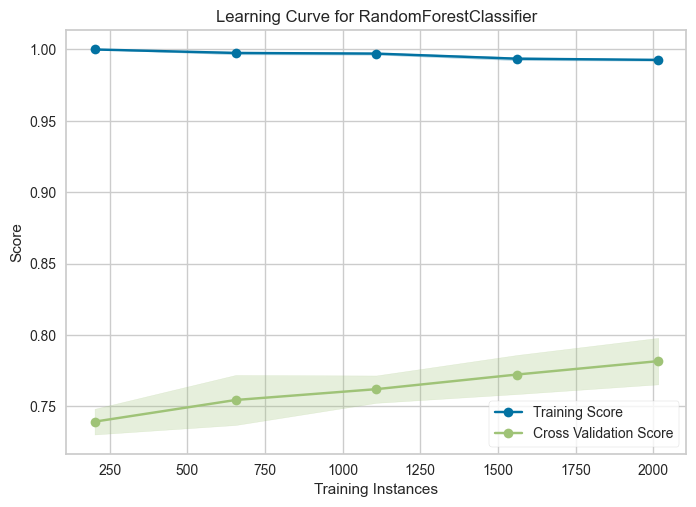

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [31]:
# 2. Learning Curve

# Importing learning curve visualizer
from yellowbrick.model_selection import LearningCurve
# Creating the learning curve
visualizer = LearningCurve(RandomForestClassifier(), n_jobs=-1, cv=10,scoring="accuracy")
visualizer.fit(X, y)
visualizer.show(outpath="./assets/part6_learningcurve.png")
visualizer.show()

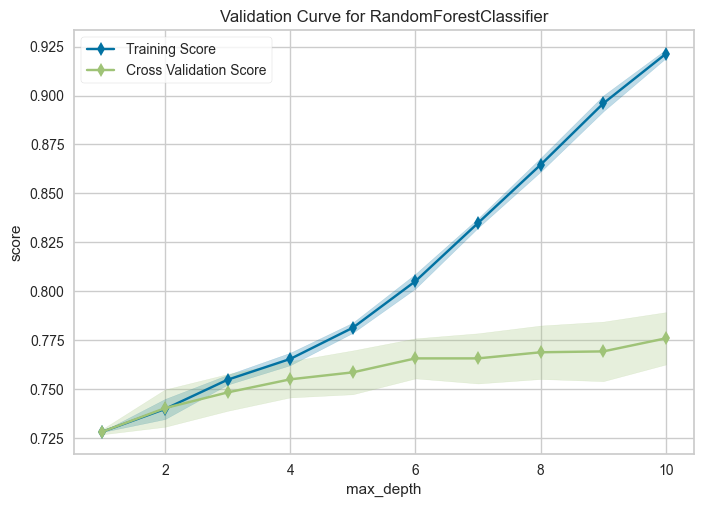

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [32]:
# 3. Partial Dependence Plot

# Importing partial dependence plot visualizer
from yellowbrick.model_selection import ValidationCurve
# Creating the validation curve
visualizer = ValidationCurve(RandomForestClassifier(), param_name="max_depth", param_range=np.arange(1, 11), cv=10, scoring="accuracy", n_jobs=-1)
visualizer.fit(X, y)
visualizer.show(outpath="./assets/part6_partialdependence.png")
visualizer.show()



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)

